# SCIMPLE 1.10.3 examples of use

In [1]:
import sys
sys.path.append('c:/Prog/Python/Scimple/scm')

In [2]:
# from importlib import reload
# reload(kafka)

## PySpark

In [7]:
from scimple import pyspark_contexts
sc, sqlc = pyspark_contexts()
sc

<SparkContext master=local[*] appName=pyspark-shell>

##### Word Count on some scimple source file:

In [4]:
import re
word_count = sc.textFile('scimple/plot.py').flatMap(lambda line: re.split(r' |:|,|\n|\t|\(|\)|\{|\}|\[|\]|"|\'', line))\
               .filter(lambda word: len(word)!=0)\
               .map(lambda word: (word, 1))\
               .reduceByKey(lambda a,b: a+b).sortBy(lambda pair: pair[1]).collect()

##### Data Viz:
(more in 'Plot' section)

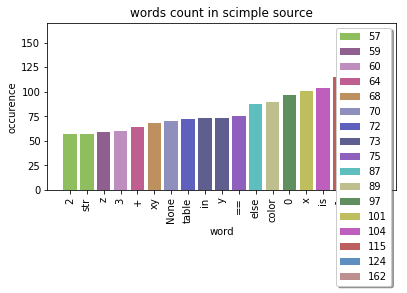

In [6]:
from scimple import Plot
%matplotlib inline
Plot(title='words count in scimple source', xlabel='word', ylabel='occurence')\
     .add(word_count[-20:-1], 0, 1, marker='bar', colored_by=1)

## Kafka

In [8]:
from scimple import kafka

In [26]:
kafka.start_server(window=5)

Kafka server started


In [2]:
dstream = kafka.create_dstream('readme_lines')

In [40]:
rdd_buff = list()
dstream.foreachRDD(lambda rdd: rdd_buff.append(rdd.collect()))

In [29]:
kafka.start_listening()

StreamingContext started


In [30]:
import time
for line in open('README.rst', 'r').read().split('\n'):
    kafka.talk('readme_lines', line)

In [31]:
kafka.flush()

In [32]:
kafka.stop_listening()

StreamingContext closed


In [33]:
kafka.stop_server()

Kafka server ended


In [38]:
from scimple.utils import flatten_n_times
print('\n'.join([key_value[1] for key_value in flatten_n_times(1,rdd_buff)]))

Scimple Lib
Plot your data scimply
github.com/EnzoBnl/Scimple

Enzo Bonnal
enzobonnal@gmail.com

TEST:
	Test package by running: 
	pip install scimple
	or locally within cloned repository: pip install .


### Environment to JSON

In [9]:
from scimple import save_environ
name = save_environ()
import os
import json
print(json.load(open(name))['PYTHONPATH'])
os.remove(name)

SUCCESS : Path exported in JSON
c:/Prog/Python/MyLibs;


## Plots

In [1]:
from scimple import Plot, get_sample, xgrid, ygrid
import pandas as pd
import math
import random
tab = get_sample('xyz', pd.DataFrame)
tab_=[[i,i//2] for i in range(20)]
charges = get_sample('charges', pd.DataFrame)
tab.columns=['atom', 'x', 'y', 'z']
# %matplotlib notebook
%matplotlib inline

using scimple 1.10.3


##### `colored_by` parameter possibilities

No handles with labels found to put in legend.


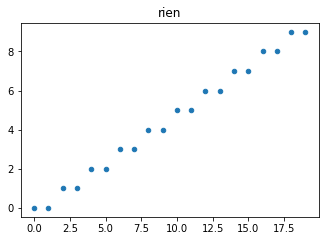

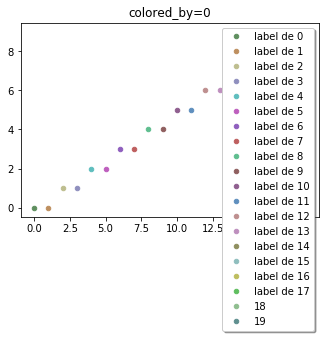

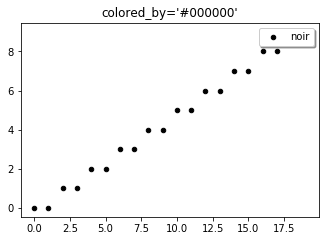

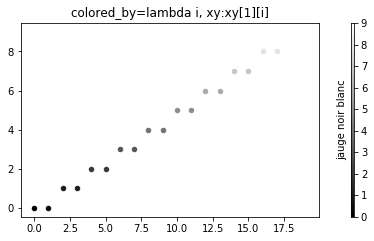

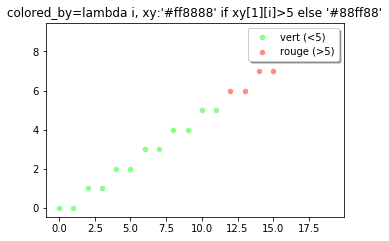

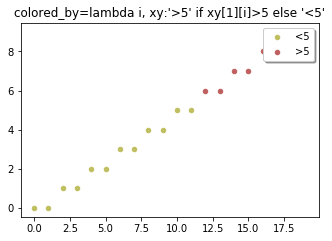

In [2]:
Plot(title="rien").add(tab_, 0, 1)
Plot(title="colored_by=0").add(tab_, 0, 1, colored_by=0,
                               label={str(i):'label de '+str(i) for i in range(18)})
Plot(title="colored_by='#000000'").add(tab_, 0, 1, colored_by='#000000',
                                       label="noir")
Plot(title="colored_by=lambda i, xy:xy[1][i]")\
    .add(tab_, 0, 1, colored_by=lambda i, xy:xy[1][i],
         label="jauge noir blanc")
Plot(title="colored_by=lambda i, xy:'#ff8888' if xy[1][i]>5 else '#88ff88'")\
    .add(tab_, 0, 1, colored_by=lambda i, xy:'#ff8888' if xy[1][i]>5 else '#88ff88',
         label={'#ff8888' :"rouge (>5)", '#88ff88': "vert (<5)"})
Plot(title="colored_by=lambda i, xy:'>5' if xy[1][i]>5 else '<5'")\
    .add(tab_, 0, 1, colored_by=lambda i, xy:'>5' if xy[1][i]>5 else '<5')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


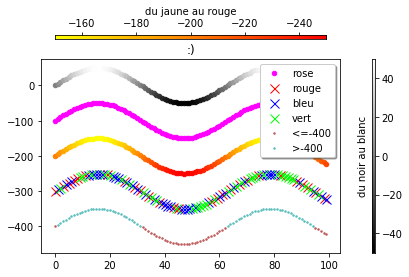

In [11]:
Plot(2, title=':)').add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10),
                        marker='.', colored_by=lambda i, xy: xy[1][i], label='du noir au blanc') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 100,
         marker='.', colored_by='#ff00ff', label='rose') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 200,
         marker='.', colored_by=lambda i, xy: xy[1][i], label='du jaune au rouge') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 300,
         marker='x', colored_by=lambda i, xy: ['#ff0000', '#00ff00', '#0000ff'][int(xy[1][i]) % 3],
         label={'#ff0000': 'rouge', '#00ff00': 'vert', '#0000ff': 'bleu'}) \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 400,
         marker='.', markersize=3,
         colored_by=lambda i, xy: '>-400' if xy[1][i] > -400 else '<=-400')

##### Some plays with molecules

No handles with labels found to put in legend.


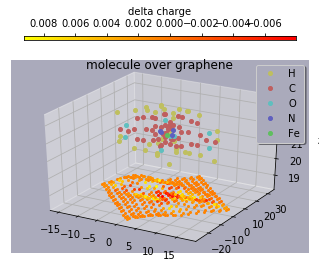

In [3]:
Plot(3, zlabel='z', bg_color='#aaaabb', title="molecule over graphene").magic('invert_color_bars') \
    .add(tab, 'x', 'y', 'z', first_line=101, markersize=4, marker='.',
         colored_by=lambda i, _: sum(charges.loc[101 + i,:])-4, label='delta charge') \
    .add(tab, 'x', 'y', 'z', last_line=100
         , markersize=4, marker='o', colored_by='atom')

In [ ]:
dict_atoms_colors={'H': '#ffffff', 'C':'#000000', 'N':'#0000aa', 'O':'#cc0000', 'Fe':'#aa00aa'}
dict_colors_atoms={c: a for a, c in dict_atoms_colors.items()}
Plot(2, bg_color='#225522', title="2D z axis projection") \
    .add(tab, 'x', 'y', first_line=101, markersize=10, marker='.',
         colored_by=lambda i, _: sum(charges.loc[101 + i,:])-4, label='delta charge')\
    .add(tab, 'x', 'y', last_line=100, colored_by=lambda i, xy: dict_atoms_colors[tab['atom'][i]], marker='.',
        label=dict_colors_atoms)

In [ ]:
Plot(2, bg_color='#cccccc', xlabel="x axis", ylabel="y axis", title="comparison") \
    .add(tab, 'x', 'y', first_line=101, markersize=6, marker='o',
         colored_by=lambda i, _: tab['z'][101 + i],
         label="z axis") \
    .add(tab, 'x', 'y', first_line=101, markersize=4, marker='x',
         colored_by=lambda i, _: charges.loc[101 + i, 2],
         label="external electrons")

In [ ]:
Plot(2, xlabel="atom", ylabel="z axis", title="z dispersion") \
    .add(tab, 'atom', 'z', markersize=6, marker='o', colored_by='atom')

In [ ]:
Plot(2, bg_color="#88aa88").add(x=range(5), y=[15] + [random.randint(1, 10) for _ in range(4)], marker='bar',
                                colored_by=lambda i, xy: xy[1][i]) \
    .add(x=range(5), y=[15] + [random.randint(1, 10) for _ in range(4)], marker='bar',
         colored_by=lambda i, xy: xy[1][i], markersize=0.5) \
    .add(x=range(-1, 6), y=[5] * 7, colored_by='#bb5555')

##### again some `colored_by` demo, this time in 3D

In [ ]:
Plot(3, title='simple color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 5000,
         marker='.', colored_by='#aa00aa', label='rose', markersize=2) 

In [ ]:
Plot(3, title='color bars')\
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 2000,
         marker='.', colored_by=lambda i, xy: xy[2][i], label='du jaune au rouge') \
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2),
                        z=lambda i, x, y: (x[i] * y[i]) ** 3 + 8000,
                        marker='o', colored_by=lambda i, xy: xy[2][i], label='du noir au blanc', markersize=2) 

In [ ]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 1000,
         marker='.', colored_by=lambda i, xy: ['#aa0000', '#00aa00', '#0000aa'][int(xy[2][i]) % 3],
         label={'#aa0000': 'rouge', '#00aa00': 'vert', '#0000aa': 'bleu'}, markersize=2) 

In [ ]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 4000,
         marker='.', markersize=3,
         colored_by=lambda i, xy: 'exterieur' if math.sqrt(xy[0][i] ** 2 + xy[1][i] ** 2) > 3 else 
                                  'milieu' if math.sqrt(xy[0][i] ** 2 + xy[1][i] ** 2) > 2.5 else 
                                  'interieur')

## Stats

In [4]:
import sys
sys.path.append('c:/Prog/Python/Scimple/scm')
from scimple import Serie

In [5]:
s = Serie([0,1,2,1,3,1,3,2,0,2,3,1,3,3,3,3,2], Serie.quantitative_discrete)

In [6]:
s.moyenne

1.9411764705882353

In [7]:
s.tableau_statistique

,n,f
valeurs,,
0,2,0.117647
1,4,0.235294
2,4,0.235294
3,7,0.411765
